# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [56]:
# Resolver acá
import wbdata
import pandas as pd
indicadores = {"GFDD.DM.01": "Capitalización bursátil respecto al PIB (%)","GFDD.DI.02": "Activos de bancos comerciales respecto al PIB (%)"}
#GFDD.DM.01 Capitalización bursátil respecto al PIB (%)
#GFDD.DI.02 Activos de bancos comerciales respecto al PIB (%)
data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])
df = pd.DataFrame(data=data)

In [58]:
df = df.reset_index()  # Asegurar que 'date' es una columna

# Filtrar desde el año 2011 en adelante
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df = df[df['date'].dt.year >= 2011]

df_usa = df[df['country'] == 'United States'].sort_values(by='date', ascending=True).head(11)
df_argentina = df[df['country'] == 'Argentina'].sort_values(by='date', ascending=True).head(11)

# Unir los dos DataFrames
df_combined = pd.concat([df_usa, df_argentina])

print(df_combined)

    index        country       date  \
72     72  United States 2011-01-01   
71     71  United States 2012-01-01   
70     70  United States 2013-01-01   
69     69  United States 2014-01-01   
68     68  United States 2015-01-01   
67     67  United States 2016-01-01   
66     66  United States 2017-01-01   
65     65  United States 2018-01-01   
64     64  United States 2019-01-01   
63     63  United States 2020-01-01   
62     62  United States 2021-01-01   
10     10      Argentina 2011-01-01   
9       9      Argentina 2012-01-01   
8       8      Argentina 2013-01-01   
7       7      Argentina 2014-01-01   
6       6      Argentina 2015-01-01   
5       5      Argentina 2016-01-01   
4       4      Argentina 2017-01-01   
3       3      Argentina 2018-01-01   
2       2      Argentina 2019-01-01   
1       1      Argentina 2020-01-01   
0       0      Argentina 2021-01-01   

    Capitalización bursátil respecto al PIB (%)  \
72                                    100.26300   


In [59]:
df_combined

,index,country,date,Capitalización bursátil respecto al PIB (%),Activos de bancos comerciales respecto al PIB (%)
72,72,United States,2011-01-01,100.26300,59.39561
71,71,United States,2012-01-01,114.85400,59.29870
70,70,United States,2013-01-01,142.69800,58.27073
69,69,United States,2014-01-01,150.02600,59.23862
68,68,United States,2015-01-01,137.68800,60.82715
67,67,United States,2016-01-01,146.30700,63.93101
66,66,United States,2017-01-01,164.89400,63.03008
65,65,United States,2018-01-01,148.27300,63.22401
64,64,United States,2019-01-01,158.57200,64.00681
63,63,United States,2020-01-01,194.88900,74.16846


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [44]:
# Resolver acá



#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

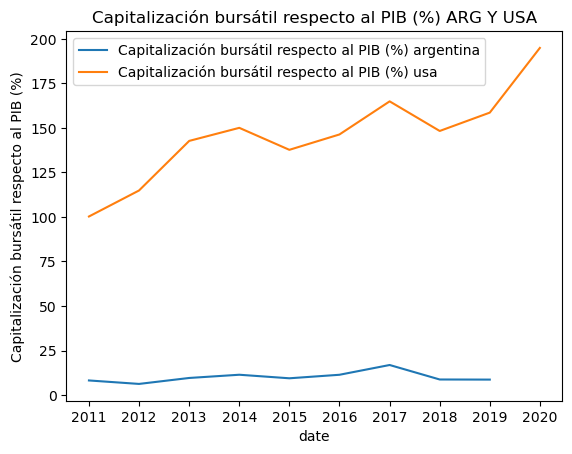

In [60]:
# Resolver acá estilo pyplot
import matplotlib.pyplot as plt
# Definimos  vectores  de datos  para  serie 1 (Capitalización bursátil respecto al PIB (%))
x1 = df_argentina[df_argentina["country"]=="Argentina"]["Capitalización bursátil respecto al PIB (%)"]
y1 = df_argentina[df_argentina["country"]=="Argentina"]["date"]
# Definimos  vectores  de datos  para  serie 2 (térmica)
x2 = df_usa[df_usa["country"]=="United States"]["Capitalización bursátil respecto al PIB (%)"]
y2 = df_usa[df_usa["country"]=="United States"]["date"]


plt.plot(y1, x1, label="Capitalización bursátil respecto al PIB (%) argentina") # serie 1
plt.plot(y2, x2, label="Capitalización bursátil respecto al PIB (%) usa") # serie 2

# Modifico  labels
plt.xlabel("date")
plt.ylabel("Capitalización bursátil respecto al PIB (%)")
plt.title("Capitalización bursátil respecto al PIB (%) ARG Y USA")
plt.legend()
plt.show()

In [ ]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
